# Project Title - EpiRecipes Visualization Application



**Objective**  - This assignment is designed to evaluate the candidate’s ability to clean, analyze, and
extract insights from data. The focus is on applying creativity to explore the dataset, present
actionable insights, and effectively communicate these through visualizations and a brief video
explanation. The candidate is expected to demonstrate a strong understanding of data analysis
fundamentals and storytelling with data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Data

In [48]:
train = pd.read_csv('recipedataset.csv')
train.head(5)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Task 1 : Data Cleaning and Preprocessing

# Understanding the data 

In [49]:
train.shape

(20052, 680)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(5), int64(674), object(1)
memory usage: 104.0+ MB


In [52]:
cat_columns = [f for f in train.columns if train.dtypes[f] == 'object']
cat_columns

['title']

In [53]:
cat_columns = [f for f in train.columns if train.dtypes[f] == 'float']
cat_columns

['rating', 'calories', 'protein', 'fat', 'sodium']

# Understanging the contribution of some specfic columns 

In [54]:

columns = []
percentages = []

# Loop through the columns
for f in train.columns:
    if train.dtypes[f] == 'int64':
        value_1 = train[f].value_counts()
        percentage = (value_1.get(1, 0) / train.shape[0]) * 100
        if percentage >= 20:
            columns.append(f)
            percentages.append(percentage)

# Create a dictionary with the lists
value = {
    'Impact_values': columns,
    'percent_used': percentages
}

# Convert the dictionary to a DataFrame
frame = pd.DataFrame(value)
print(frame)

        Impact_values  percent_used
0                bake     22.007780
1         bon appétit     46.653700
2             gourmet     33.153800
3              kosher     30.794933
4         peanut free     41.841213
5         pescatarian     30.131658
6        quick & easy     26.790345
7            soy free     40.335129
8              summer     20.701177
9       tree nut free     35.128665
10         vegetarian     34.141233
11  wheat/gluten-free     24.466387


In [55]:
train['bon appétit'].describe()

count    20052.000000
mean         0.466537
std          0.498891
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: bon appétit, dtype: float64

In [56]:
#chrecking the effect of some of the columns on the data set 

In [57]:
train.yogurt.describe()

count    20052.000000
mean         0.026332
std          0.160123
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: yogurt, dtype: float64

In [58]:
train.yogurt.value_counts()

0    19524
1      528
Name: yogurt, dtype: int64

 percentage of values which are zero 

In [59]:
percentage = (19524 / 20052)*100
print(percentage)

97.36684619988031


From above we can see that from the column yogurt we can see that 97% of the values are zero nso thius column wont make much impact on out main consenr the rating.

# Reducing the data set 

In [60]:
train_1 = train[['title','rating','calories','protein','fat','sodium', 'bake', 'bon appétit','gourmet','kosher','peanut free','quick & easy','soy free', 'summer', 'tree nut free',  'vegetarian', 'wheat/gluten-free']]

In [61]:
train_1.nunique()

title                17736
rating                   8
calories              1858
protein                282
fat                    326
sodium                2434
bake                     2
bon appétit              2
gourmet                  2
kosher                   2
peanut free              2
quick & easy             2
soy free                 2
summer                   2
tree nut free            2
vegetarian               2
wheat/gluten-free        2
dtype: int64

# Handeling Duplicate rows 

In [62]:
df_no_duplicity = train_1.drop_duplicates()
df_no_duplicity.head(5)


,title,rating,calories,protein,fat,sodium,bake,bon appétit,gourmet,kosher,peanut free,quick & easy,soy free,summer,tree nut free,vegetarian,wheat/gluten-free
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,0,0,0,0,0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,1,1,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,1,0,0,0,0,0,0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0,1,0,1,1,0,1,0,1,0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,1,1,0,0,0,1,0,0,0,1,0


In [63]:
df_no_duplicity.shape

(18244, 17)

In [64]:
df_no_duplicity['rating'].value_counts()

4.375    7362
3.750    4755
5.000    2382
0.000    1655
3.125    1356
2.500     481
1.250     145
1.875     108
Name: rating, dtype: int64

# Finding missing value

In [80]:
df_no_duplicity.isna().any() # chrecking the presents of null values 

title                False
rating               False
calories              True
protein               True
fat                   True
sodium                True
bake                 False
bon appétit          False
gourmet              False
kosher               False
peanut free          False
quick & easy         False
soy free             False
summer               False
tree nut free        False
vegetarian           False
wheat/gluten-free    False
dtype: bool

In [65]:
# Assuming df_no_duplicity is your DataFrame
missing_values = df_no_duplicity.isnull().sum()
percent_missing = (df_no_duplicity.isnull().sum() / df_no_duplicity.shape[0]) * 100

# Creating a dictionary and then a DataFrame
value = {
    'missing_values': missing_values,
    'percent_missing': percent_missing
}
frame = pd.DataFrame(value)

# Display the DataFrame
print(frame)

                   missing_values  percent_missing
title                           0         0.000000
rating                          0         0.000000
calories                     3748        20.543740
protein                      3780        20.719141
fat                          3800        20.828766
sodium                       3749        20.549222
bake                            0         0.000000
bon appétit                     0         0.000000
gourmet                         0         0.000000
kosher                          0         0.000000
peanut free                     0         0.000000
quick & easy                    0         0.000000
soy free                        0         0.000000
summer                          0         0.000000
tree nut free                   0         0.000000
vegetarian                      0         0.000000
wheat/gluten-free               0         0.000000


<AxesSubplot:>

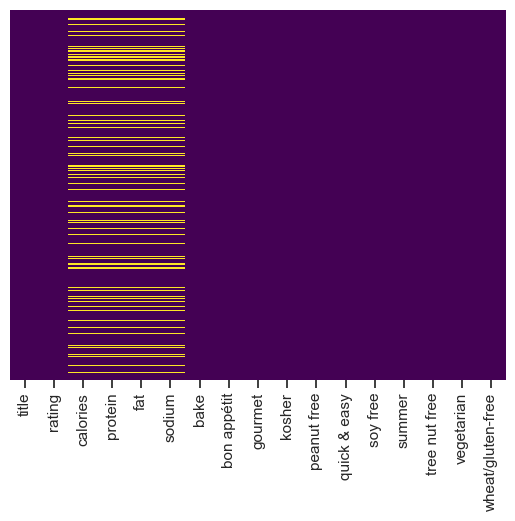

In [66]:
sns.heatmap(df_no_duplicity.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From  the above plot we can say that the data  has missig values for varibales calories, protein , fat and sodium.

In [67]:
# Drop rows where all of the 4 main columns have null values

df_cleaned = df_no_duplicity.dropna()

# Print the cleaned DataFrame
df_cleaned.head(5)


,title,rating,calories,protein,fat,sodium,bake,bon appétit,gourmet,kosher,peanut free,quick & easy,soy free,summer,tree nut free,vegetarian,wheat/gluten-free
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,0,0,0,0,0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,1,1,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,1,0,0,0,0,0,0,0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,1,1,0,0,0,1,0,0,0,1,0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0,1,0,0,0,1,0,1,0,0,0


In [68]:
#print the shape of the cleaned data set 
print(df_cleaned.shape)


(14440, 17)


In [69]:
#checking the missing values again 

<AxesSubplot:>

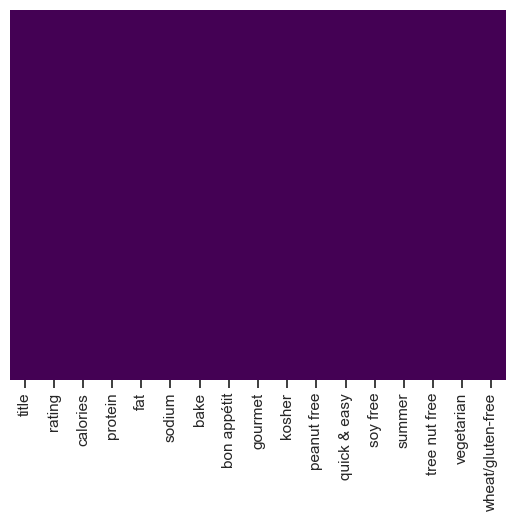

In [70]:
sns.heatmap(df_cleaned.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the above plot we can see that the data doesnt have any missing values now.

# Outlier detection

In [71]:
df_results = pd.concat([df_cleaned[col].describe().to_frame().T.assign(column=col) 
                        for col in df_cleaned.columns if df_cleaned[col].dtype == 'float64'])

# Reorder columns to have 'column' first
df_results = df_results[['column'] + [col for col in df_results.columns if col != 'column']]

print(df_results)

            column    count         mean            std  min     25%      50%  \
rating      rating  14440.0     3.764370       1.272717  0.0    3.75    4.375   
calories  calories  14440.0  6649.950762  375585.468461  0.0  206.00  347.000   
protein    protein  14440.0    92.416620    3515.400114  0.0    3.00    9.000   
fat            fat  14440.0   363.644875   21365.097110  0.0    8.00   18.000   
sodium      sodium  14440.0  6601.306233  349152.165993  0.0   90.00  306.000   

              75%         max  
rating      4.375         5.0  
calories  601.000  30111218.0  
protein    28.000    236489.0  
fat        34.000   1722763.0  
sodium    735.000  27675110.0  


Here we can see that the standard deveation is very high for calories , fats , sodium this indicates that the data poits and widely spried and outliers and present in the data set.

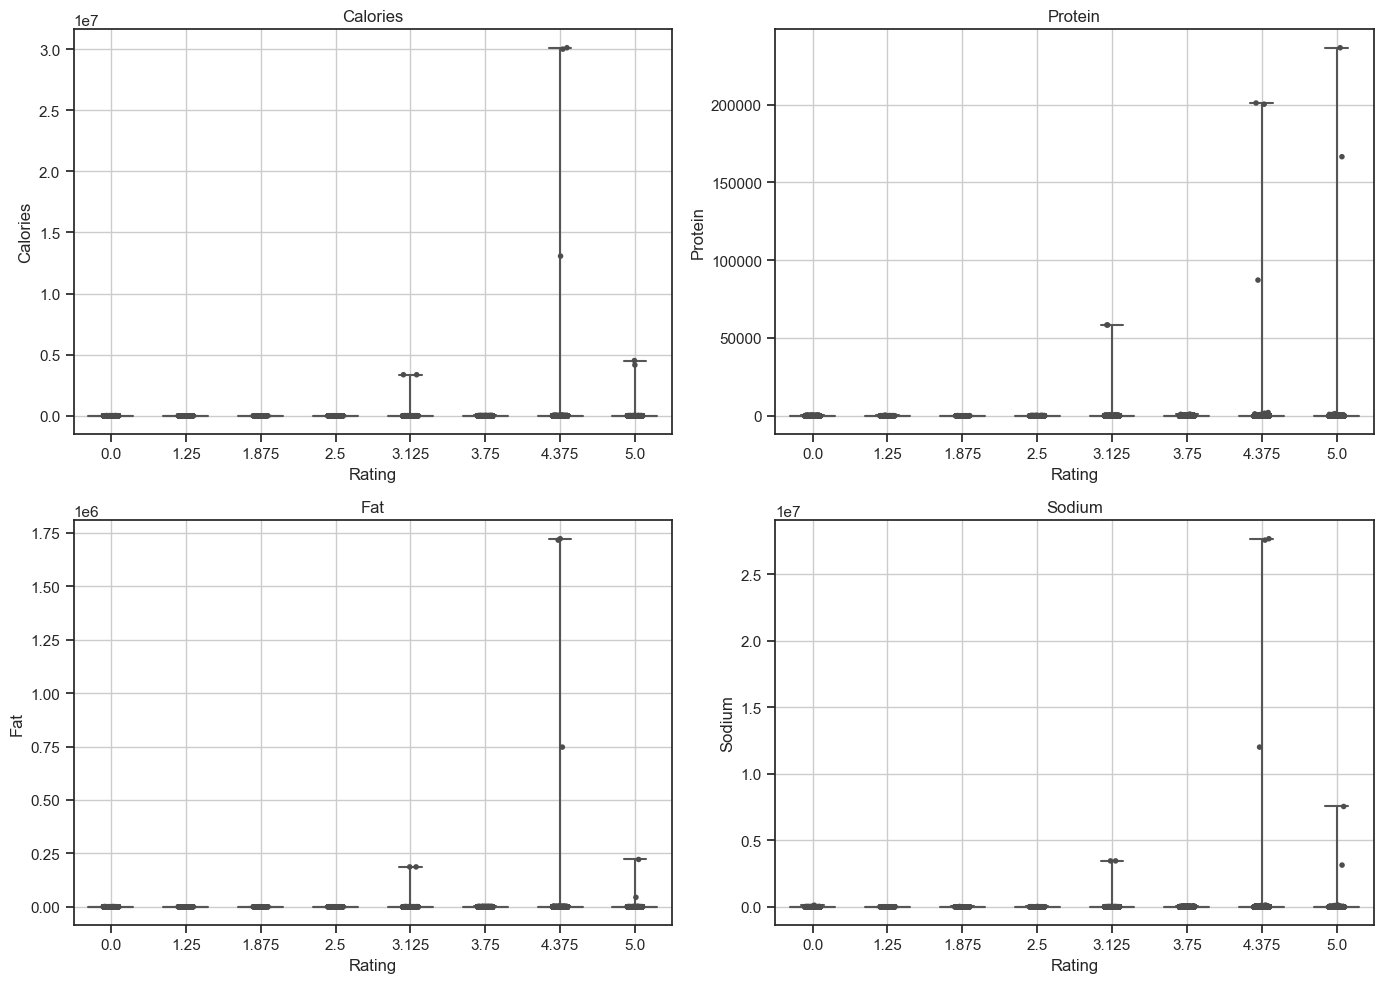

In [72]:
sns.set_theme(style="ticks")
columns_to_plot = ['calories', 'protein', 'fat', 'sodium']
categorical_var = 'rating' 
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, column in enumerate(columns_to_plot):
    ax = axs[i // 2, i % 2]  
    sns.boxplot(
        x=categorical_var, y=column, data=df_cleaned, 
        whis=[0, 100], width=.6, palette="vlag", ax=ax
    )
    sns.stripplot(
        x=categorical_var, y=column, data=df_cleaned, 
        size=4, color=".3", ax=ax
    )
    ax.set_title(column.capitalize())
    ax.set_xlabel(categorical_var.capitalize())
    ax.set_ylabel(column.capitalize())
    ax.grid(True)
plt.tight_layout()
plt.show()


# Key Findings 

1. There are clear outliers in the data, especially for higher ratings (4.375 and 5.0), where some recipes have extreme values for calories, protein, fat, and sodium.
2. These outliers indicate that a few recipes contribute significantly higher nutritional values compared to the majority.
3. The sharp spikes in protein, fat, and sodium suggest that highly rated recipes can vary widely in their nutritional content.
4. Outliers in calories and sodium are especially notable, indicating that some top-rated recipes may be unusually dense in these elements.

# Remove Outliers

In [73]:
def remove_outliers(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

# Columns to clean for outliers
columns_to_clean = ['calories', 'protein', 'fat', 'sodium']

# Apply the function to each column
for col in columns_to_clean:
    df = remove_outliers(df_cleaned, col)
df.head(5)


,title,rating,calories,protein,fat,sodium,bake,bon appétit,gourmet,kosher,peanut free,quick & easy,soy free,summer,tree nut free,vegetarian,wheat/gluten-free
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,0,0,0,0,0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,1,1,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,1,0,0,0,0,0,0,0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,1,1,0,0,0,1,0,0,0,1,0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0,1,0,0,0,1,0,1,0,0,0


In [74]:
print(df.shape)

(13410, 17)


# Task 2 : EDA 

# Correlation 

<AxesSubplot:>

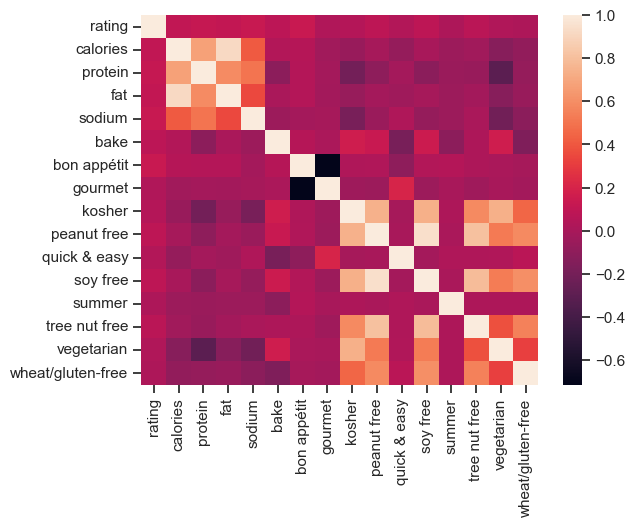

In [75]:
sns.heatmap(df.corr(),annot= False)

# Key Findings


Correlation with rating
1. **Positive Correlation**: Higher protein and moderate fat content lead to better ratings; gourmet foods are rated higher due to perceived quality.

2. **Negative Correlation**: Foods with high calories and sodium receive lower ratings, reflecting a preference for healthier options.

3. **Neutral Impact**: Dietary labels like vegetarian show weak correlations, indicating taste and quality matter more than dietary preferences.

4. **Consumer Preferences**: Consumers prefer nutritious foods with high protein and low calories, showing a trend toward health consciousness.

Correlation amongst variables
Here are the key findings summarized in short points:

1. **Nutritional Relationships**: A strong positive correlation exists among calories, protein, and fat, indicating that energy-dense foods are often rich in these macronutrients.

2. **Sodium Influence**: High sodium foods correlate positively with calories and fat, raising awareness of dietary sodium implications.

3. **Dietary Preferences**: Dietary restrictions (vegetarian, kosher, peanut-free) show patterns with nutritional features but do not significantly affect nutritional values.

4. **Low Caloric Vegetarian Options**: A negative correlation between vegetarian status and calories suggests vegetarian foods may generally have lower caloric content.

5. **Cooking Attributes**: The "bon appétit" variable reveals unique relationships with nutrition, indicating trends in recipe creation based on specific nutritional characteristics.

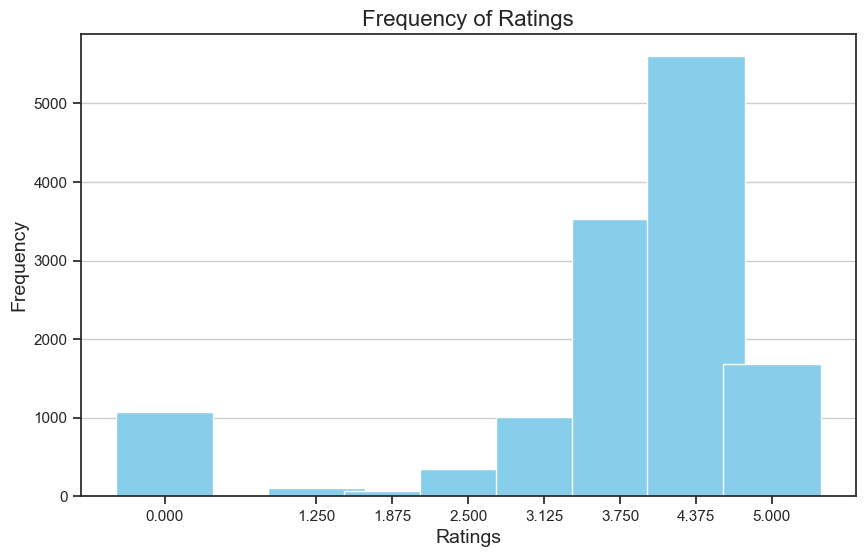

In [76]:
rating_counts = df['rating'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.title('Frequency of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rating_counts.index)  
plt.grid(axis='y')  
plt.show()

# Key Findings 

1. Most of the recipes have ratings 4.375.
2. Their are vary few recipied which have rating 1.250 and 1.875.
3. we can see that the rating variable is not normally distributed.



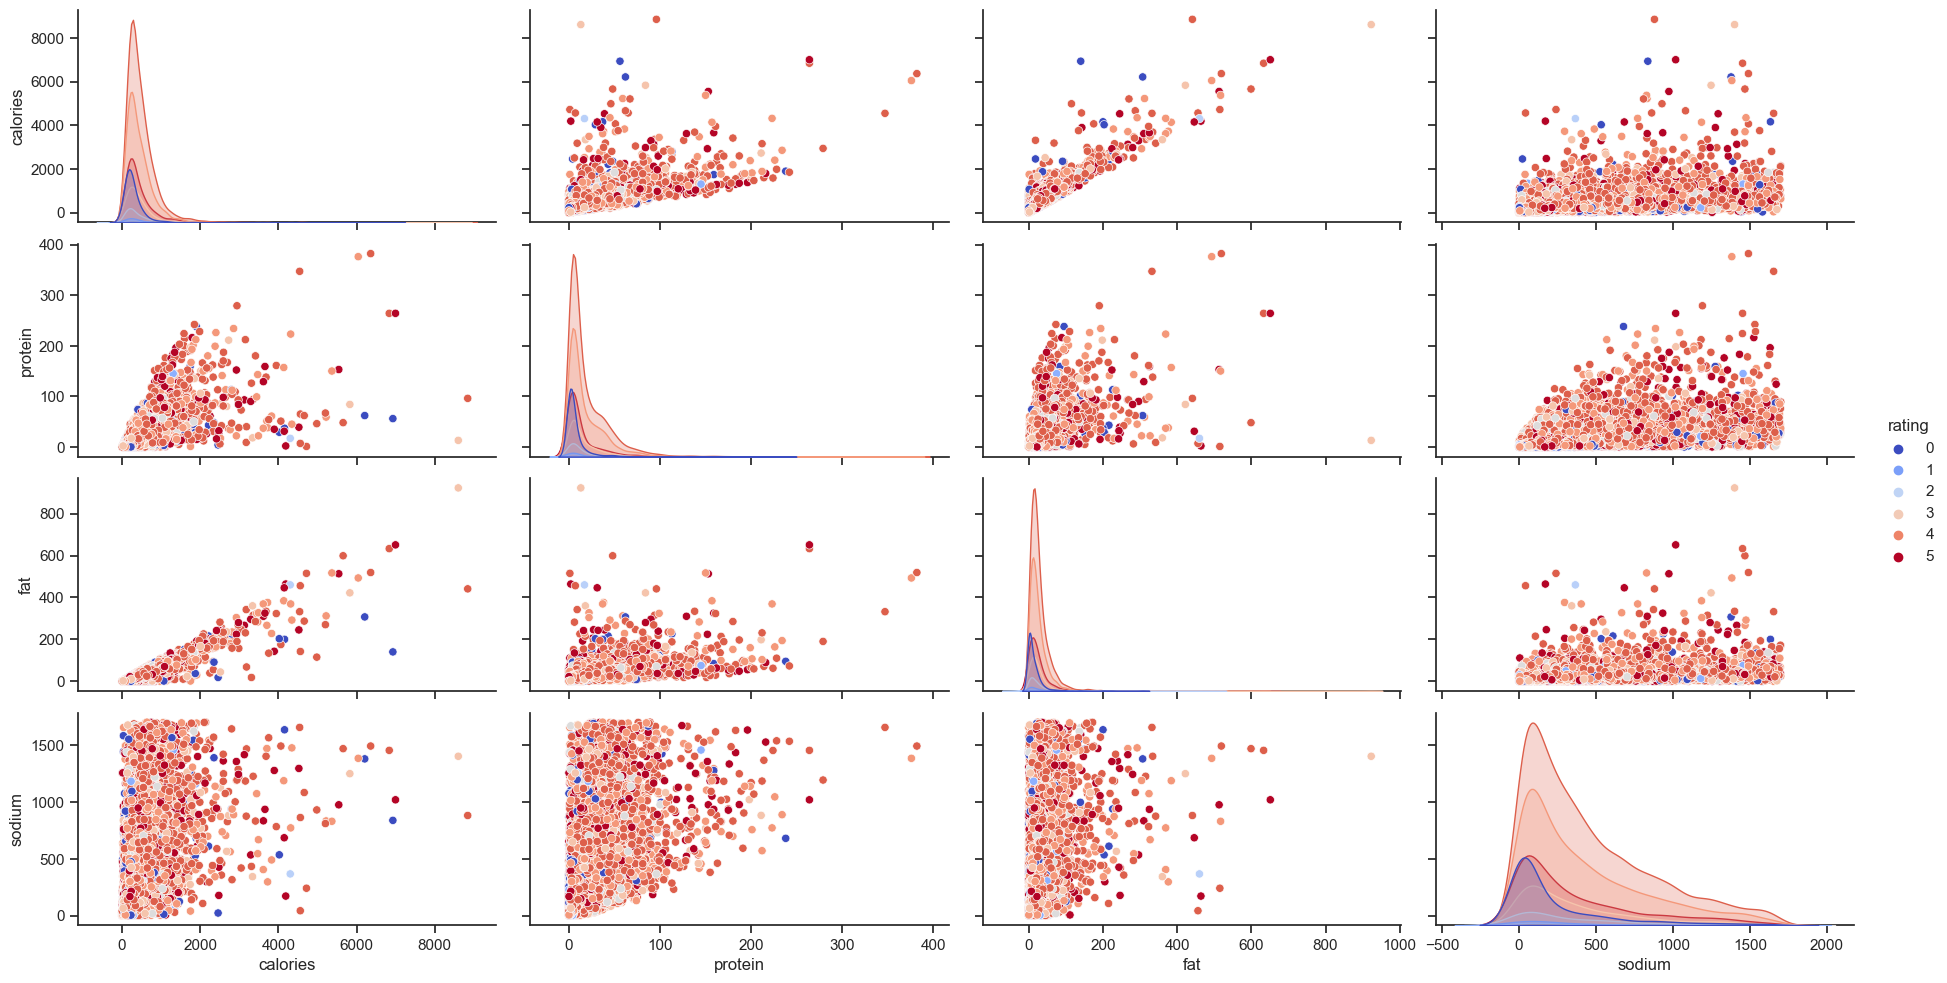

In [77]:
sns.pairplot(df,vars=['calories','protein','fat', 'sodium'],hue='rating',palette='coolwarm',aspect=1.9);

1. There is a positive correlation between calories and protein, meaning that higher calories typically lead to higher protein content.

2. A weak positive correlation exists between calories and sodium, indicating that sodium levels generally increase with higher calorie counts, but this relationship is not strong.

3. The relationship between protein and sodium is unclear, as a slight scatter in the data suggests a weaker correlation or no correlation.

4. The distribution of calories is skewed to the right, primarily due to a few high-calorie observations.

5.  The distribution of protein is also skewed to the right, but to a lesser extent than calories.

6.  The distribution of sodium appears to be more symmetric, featuring a central peak with tails extending in both directions.

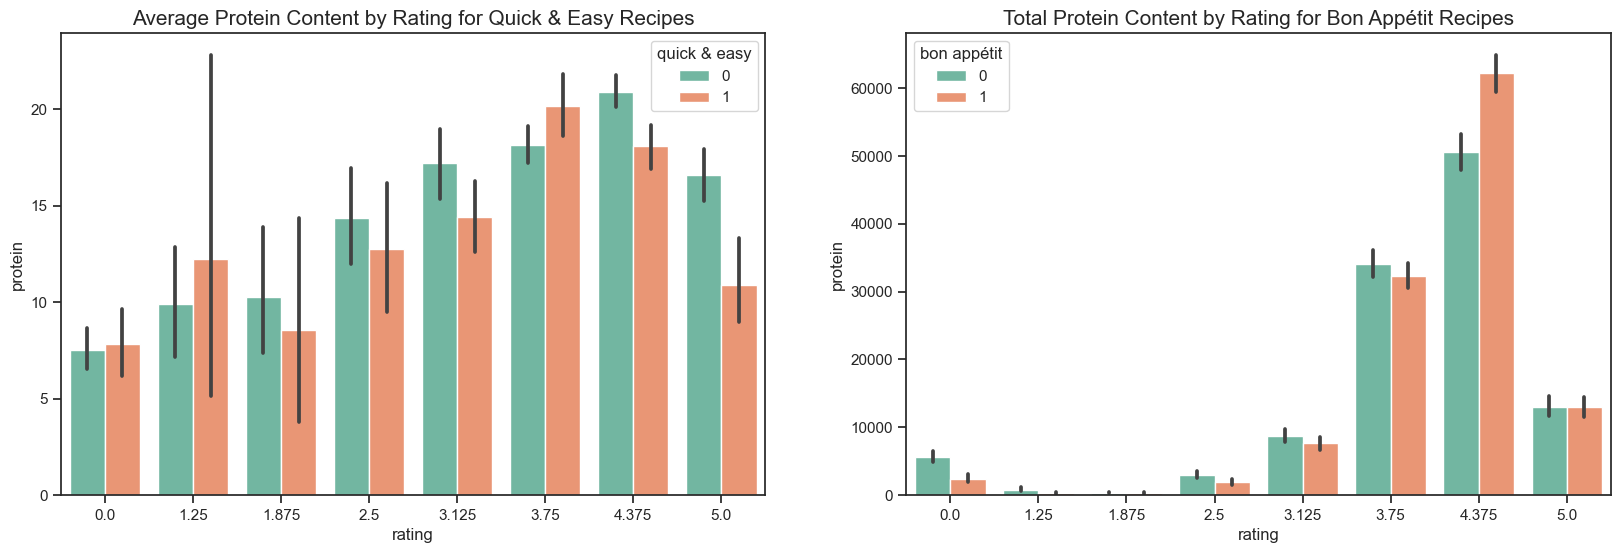

In [78]:
fig,ax = plt.subplots(figsize=(20,6),ncols=2,nrows=1)
sns.barplot(x="rating",y="protein",hue="quick & easy",estimator=np.mean,data=df,ax=ax[0] , palette="Set2").set_title(label = 'Average Protein Content by Rating for Quick & Easy Recipes', size =15)
sns.barplot(x="rating",y="protein",hue = "bon appétit",estimator=np.sum,data=df,ax=ax[1] , palette="Set2").set_title(label = 'Total Protein Content by Rating for Bon Appétit Recipes', size =15);

# Key Findings

- Protein content increases as ratings go up, peaking around 4.375.
- "Quick & easy" recipes have lower protein compared to non-quick ones, especially in higher ratings.
- "Bon Appétit" recipes have much higher total protein than non-"Bon Appétit" ones.
- Total protein jumps sharply with higher ratings, especially around 4.375.